In [1]:
import numpy as np
import matplotlib.pyplot as plt
# show plot first run
%matplotlib inline 
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

def create_matrix(x, degree):
    # Lösen Sie das lineare Ausgleichsproblem
    # Hinweis: Nutzen Sie bitte hier nicht np.linalg.lstsq!, sondern implementieren sie A^T A x = A^T b selbst
    A = np.zeros((len(x),degree+1))
    data = np.matrix(x)
    #print(data.shape)
    
    for n in range(degree+1):
        pexp = np.power(data,n)
        A[:,(degree)-n] = pexp
    
    return A

Best fit for dataset: 0 is degree: [[20]] E: 39.31328665951353
Best fit for dataset: 1 is degree: [[20]] E: 38.90049778353867
Best fit for dataset: 2 is degree: [[20]] E: 368.94318735481687
Best fit for dataset: 3 is degree: [[18]] E: 324.766040893267
Best fit for dataset: 4 is degree: [[18]] E: 983.6519937922363


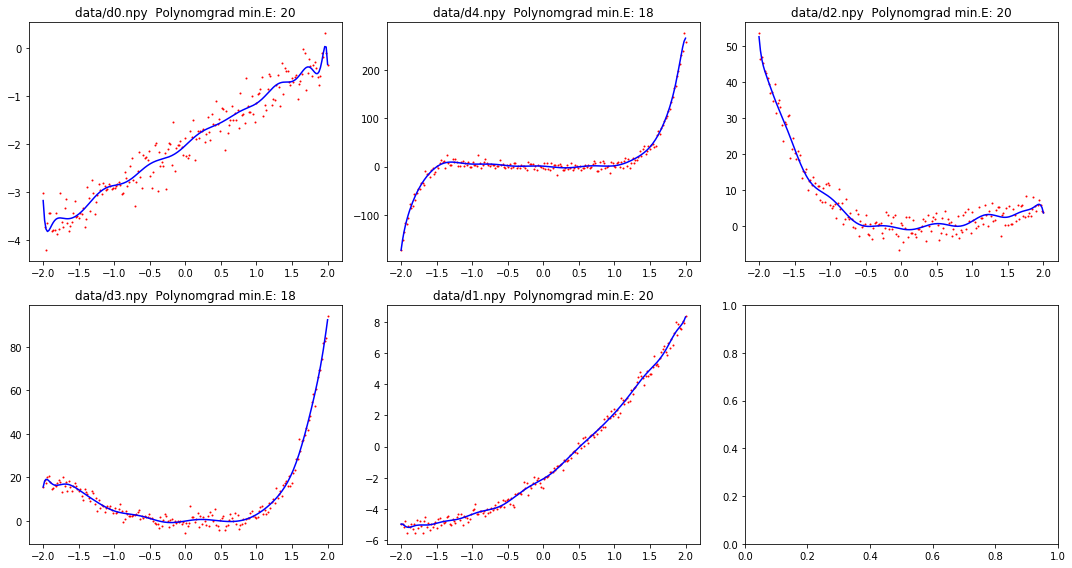

In [2]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(15, 8) )
x = np.linspace(-2,2,200)



for i in range(5):
    # Laden der gegebenen Daten d0 - d4
    data = np.load('data/d'+str(i)+'.npy')
    b = np.matrix(data)
    b = b.T
    #print(b.shape)
    
    storeE = np.matrix(np.zeros(21))

    for degree in range(21):
        # Implementieren Sie ein Funktion, die gegeben den x-Werten und dem Funktiongrad
        # die Matrix A aufstellt.
        A = create_matrix(x, degree)
        #print(A)

        # Lösen Sie das lineare Ausgleichsproblem
        # Hinweis: Nutzen Sie bitte hier nicht np.linalg.lstsq!, sondern implementieren sie A^T A x = A^T b selbst
        Ata = np.matmul(A.T, A)
        Atb = np.matmul(A.T, b)
        xvec = np.linalg.solve(Ata,Atb)
        #print(x.shape)
        #x = np.linalg.solve(A,b)
        #print(x)

        # Stellen Sie die Funktion mit Hilfe der ermittelten Koeffizienten mit matplotlib
        coeff = np.array(xvec).flatten()
        #print(coeff.shape)
        p = np.poly1d(coeff)
        #print(p)

        xfit = p(x)
        #ax[i%2,i%3].plot(x,data, 'ro', x, xfit, 'bo', markersize=1) # plot 
        storeE[0,degree] = np.sum(np.abs(data-xfit))

    idx = storeE.argmin(axis=1)
    print('Best fit for dataset:',i,'is degree:',idx,'E:',np.min(storeE))
    ## print only best curve!
    A = create_matrix(x, int(idx))
    Ata = np.matmul(A.T, A)
    Atb = np.matmul(A.T, b)
    xvec = np.linalg.solve(Ata,Atb)
    coeff = np.array(xvec).flatten()
    p = np.poly1d(coeff)
    xfit = p(x)
    ax[i%2,i%3].title.set_text('data/d'+str(i)+'.npy '+' Polynomgrad min.E: '+str(idx[0,0]))
    ax[i%2,i%3].plot(x,data, 'ro', x, xfit, 'b-', markersize=1)
 
plt.savefig('poly_fig.png', bbox_inches='tight')
fig.tight_layout()
plt.show()
